<a href="https://colab.research.google.com/github/MUbarak123-56/fast-ai/blob/master/chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook  

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv')]

In [5]:
(path/"train").ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [6]:
threes = (path/"train"/"3").ls().sorted()
sevens = (path/"train"/"7").ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [7]:
img_path = threes[1]
img3 =Image.open(img_path)
img3

In [8]:
array(img3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [9]:
tensor(img3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [10]:
im3_t = tensor(img3)

df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient("Greys")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [11]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors), len(seven_tensors)

(6131, 6265)

In [12]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [13]:
stacked_threes.shape

torch.Size([6131, 28, 28])

In [14]:
stacked_threes.ndim

3

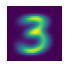

In [15]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

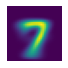

In [16]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

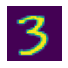

In [17]:
a_3 = stacked_threes[1]
show_image(a_3);

In [18]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [19]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [20]:
import torch.nn.functional as F

In [21]:
F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3.float(), mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [22]:
data = [[1,2,3],[4,5,6]]
array(data)

array([[1, 2, 3],
       [4, 5, 6]])

In [23]:
tns = tensor(data)
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [24]:
tns[1]

tensor([4, 5, 6])

In [25]:
tns[:,1]

tensor([2, 5])

In [26]:
tns[1,1:3]

tensor([5, 6])

In [27]:
tns + 1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [28]:
tns.type()

'torch.LongTensor'

In [29]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [30]:
valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [31]:
def mnist_distance(a,b):
  return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [32]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1766, 0.1268, 0.1492,  ..., 0.1199, 0.1355, 0.1151]),
 torch.Size([1010]))

In [33]:
def is_3(x):
  return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [34]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [35]:
is_3(valid_3_tens)

tensor([ True,  True, False,  ...,  True,  True,  True])

In [36]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()
accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [37]:
def pr_three(x, w): return (x*w).sum()

In [38]:
def f(x): return x**2

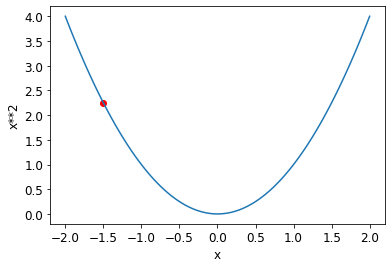

In [39]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

In [40]:
xt = tensor(3.).requires_grad_()

In [41]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [42]:
yt.backward()

In [43]:
xt.grad

tensor(6.)

In [44]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [45]:
def f(x): return (x**2).sum()

In [46]:
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [47]:
yt.backward()

In [48]:
xt.grad

tensor([ 6.,  8., 20.])

In [49]:
time = torch.arange(0,20).float()

In [50]:
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

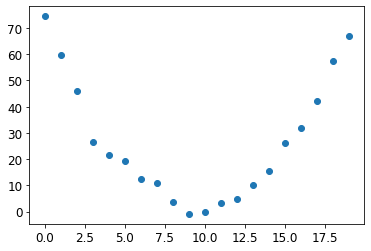

In [51]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed);

In [52]:
def f(t, params):
  a, b, c = params
  return a*(t**2) + (b*t) + c

In [53]:
def mse(preds, targets):
  return ((preds - targets)**2).mean().sqrt()

In [54]:
# Initialize parameters
params = torch.randn(3).requires_grad_()

In [55]:
# Calculate predictions
preds = f(time, params)

In [56]:
def show_preds(preds, ax = None):
  if ax is None: ax = plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds), color = 'red')
  ax.set_ylim(-300,100)

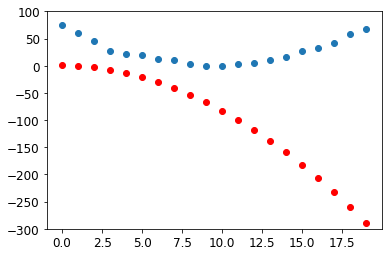

In [57]:
show_preds(preds)

In [58]:
# Calculate the loss
loss = mse(preds, speed)
loss

tensor(160.6979, grad_fn=<SqrtBackward0>)

In [59]:
# Calculate the gradients
loss.backward()
params.grad

tensor([-165.5151,  -10.6402,   -0.7900])

In [60]:
params.grad * 1e-5

tensor([-1.6552e-03, -1.0640e-04, -7.8996e-06])

In [61]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [62]:
## Step the weights
lr = 1e-3
params.data -= lr*params.grad.data
params.grad = None

In [63]:
def apply_step(params, prn=True):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= lr*params.grad.data
  params.grad = None
  if prn: 
    print(loss.item())
  return preds

In [64]:
for i in range(10):
  apply_step(params)

133.26524353027344
106.2302474975586
79.95720672607422
55.385318756103516
35.366943359375
26.461618423461914
26.02068519592285
26.01849937438965
26.018320083618164
26.018157958984375


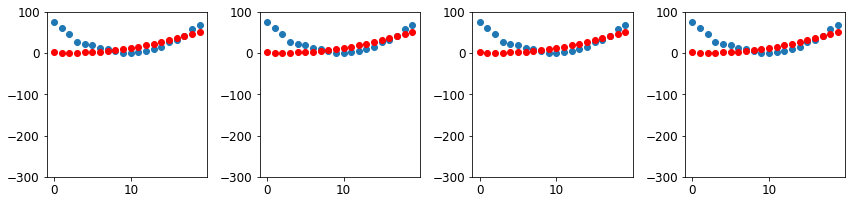

In [65]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

## MNIST training

In [66]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1,28*28)

In [67]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(-1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [68]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [69]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [70]:
def init_params(size, std=1.0):
  return (torch.randn(size)*std).requires_grad_()

In [71]:
weights = init_params((28*28, 1))

In [72]:
bias = init_params(1)

In [73]:
(train_x[0]*weights.T).sum() + bias

tensor([20.2336], grad_fn=<AddBackward0>)

In [74]:
def linear1(xb):
  return xb@weights  + bias

preds = linear1(train_x)
preds

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)

In [75]:
corrects = (preds > 0.0).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [76]:
corrects.float().mean().item()

0.4912068545818329

In [78]:
trgts = tensor([1,0,1])
prds = tensor([0.9, 0.4, 0.2])

In [79]:
def mnist_loss(predictions, targets):
  return torch.where(targets == 1, 1 - predictions, predictions).mean()

In [80]:
torch.where(trgts==1, 1 -prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [81]:
mnist_loss(prds, trgts)

tensor(0.4333)

In [83]:
mnist_loss(tensor([0.9, 0.4, 0.8]),trgts)

tensor(0.2333)

In [84]:
def sigmoid(x):
  return 1/(1 + torch.exp(-x))

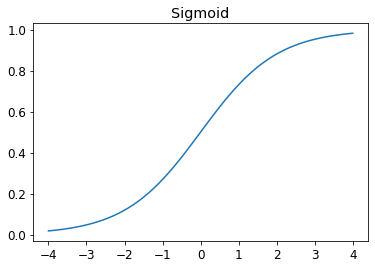

In [85]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [86]:
def mnist_loss(predictions, targets):
  predictions = predictions.sigmoid()
  return torch.where(targets == 1, 1 - predictions, predictions).mean()

## SGD & Mini Batches

In [87]:
col1 = range(15)

In [89]:
dl = DataLoader(col1, batch_size = 5, shuffle = True)
list(dl)

[tensor([ 8,  9,  5, 11,  4]),
 tensor([ 7, 13, 14,  2,  3]),
 tensor([ 6, 12, 10,  1,  0])]

In [90]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [91]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([19, 14,  0, 24, 20, 12]), ('t', 'o', 'a', 'y', 'u', 'm')),
 (tensor([23,  8,  9,  3, 16,  6]), ('x', 'i', 'j', 'd', 'q', 'g')),
 (tensor([ 4,  7,  1, 13,  2, 22]), ('e', 'h', 'b', 'n', 'c', 'w')),
 (tensor([ 5, 17, 18, 10, 11, 15]), ('f', 'r', 's', 'k', 'l', 'p')),
 (tensor([25, 21]), ('z', 'v'))]

In [92]:
weights = init_params((28*28,1))
bias = init_params(1)

In [93]:
dl = DataLoader(dset, batch_size = 256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [95]:
valid_dl = DataLoader(valid_dset, batch_size = 256)
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [96]:
preds = linear1(batch)
preds

tensor([[-2.1876],
        [-8.3973],
        [ 2.5000],
        [-4.9473]], grad_fn=<AddBackward0>)

In [97]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.7419, grad_fn=<MeanBackward0>)

In [98]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0061), tensor([-0.0420]))

In [99]:
def calc_grad(xb, yb, model):
  preds = model(xb)
  loss = mnist_loss(preds, yb)
  loss.backward()

In [100]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0121), tensor([-0.0840]))

In [101]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [102]:
def train_epoch(model, lr, params):
  for xb, yb in dl:
    calc_grad(xb, yb, model)
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

In [103]:
(preds>0.5).float() == train_y[:4]

tensor([[False],
        [False],
        [ True],
        [False]])

In [104]:
def batch_accuracy(xb, yb):
  preds = xb.sigmoid()
  correct = (preds > 0.5) == yb
  return correct.float().mean()

In [105]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.2500)

In [106]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [107]:
validate_epoch(linear1)

0.5263

In [108]:
lr = 1.0
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.6663

In [109]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.8265 0.89 0.9183 0.9276 0.9398 0.9467 0.9506 0.9525 0.9559 0.9579 0.9598 0.9608 0.9613 0.9618 0.9632 0.9637 0.9647 0.9657 0.9672 0.9677 

In [ ]:
##

## Creating an Optimizer

In [110]:
linear_model = nn.Linear(28*28,1)

In [112]:
w, b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [113]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [114]:
opt = BasicOptim(linear_model.parameters(), lr)

In [115]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [116]:
validate_epoch(linear_model)

0.4608

In [117]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [118]:
train_model(linear_model, 20)

0.4932 0.7686 0.8555 0.9136 0.9346 0.9482 0.957 0.9634 0.9658 0.9678 0.9697 0.9717 0.9736 0.9746 0.9761 0.9771 0.9775 0.9775 0.978 0.9785 

In [124]:
dls = DataLoaders(dl, valid_dl)

In [125]:
list(dls)

In [126]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func = SGD, loss_func = mnist_loss, metrics = batch_accuracy)

In [127]:
learn.fit(10, lr = lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636893,0.503603,0.495584,00:00
1,0.574750,0.193569,0.837095,00:00
2,0.209934,0.178713,0.838567,00:00
3,0.090778,0.106147,0.912659,00:00
4,0.046971,0.077506,0.931796,00:00
5,0.029948,0.062095,0.947007,00:00
6,0.023013,0.052486,0.956330,00:00
7,0.019973,0.046094,0.962218,00:00
8,0.018460,0.041603,0.965653,00:00
9,0.017567,0.038296,0.967125,00:00


### Adding Nonlinearity

In [128]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

In [129]:
def simple_net(xb):
  res = xb@w1 + b1
  res = res.max(tensor(0.0))
  res = res@w2 + b2
  return res

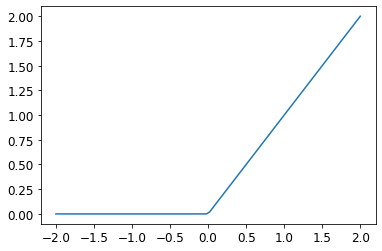

In [130]:
plot_function(F.relu)

In [131]:
simple_net = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30, 1)
)

In [132]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [133]:
learn.fit(40,0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.282075,0.411341,0.504907,00:01
1,0.136028,0.215963,0.816487,00:00
2,0.076921,0.111297,0.918057,00:02
3,0.051557,0.076208,0.943081,00:00
4,0.039615,0.059856,0.956820,00:00
5,0.033398,0.050580,0.964671,00:00
6,0.029756,0.044700,0.966634,00:00
7,0.027356,0.040660,0.967125,00:00
8,0.025615,0.037718,0.969087,00:00
9,0.024263,0.035478,0.970559,00:00


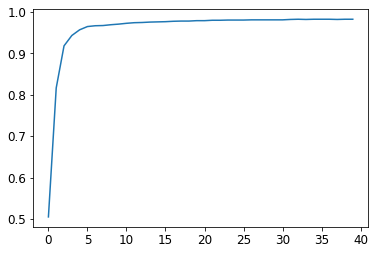

In [134]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [135]:
learn.recorder.values[-1][2]

0.98233562707901

In [136]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained = False, loss_func = F.cross_entropy, metrics = accuracy)
learn.fit_one_cycle(1, 0.1)

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.119544,0.013515,0.994112,02:51
